In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import statsmodels.formula.api as smf
import seaborn as sns

# A/B Test

$$
SE = \sqrt{\dfrac{\hat{\sigma}_{test}^2}{N_{test}} + \dfrac{\hat{\sigma}_{control}^2}{N_{control}}}
$$

Text(0.5, 0, 'Sample Allocated to Test')

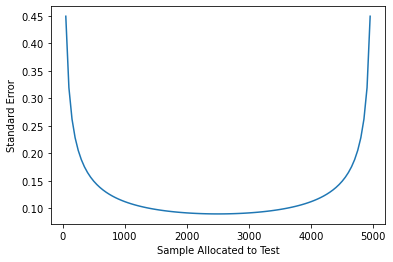

In [2]:
def se(sigma_test, sigma_control, n_test, n_control):
    return np.sqrt(sigma_test/n_test + sigma_control/n_control)


total_n = 5000

# df = pd.DataFrame(dict(test=range(50, total_n+50, 50)))
test = np.arange(50, 5000, 50)

plt.plot(test, se(10, 10, test, total_n-test))
plt.ylabel("Standard Error")
plt.xlabel("Sample Allocated to Test")


Text(0.5, 0, 'Conversion Rate (pct.)')

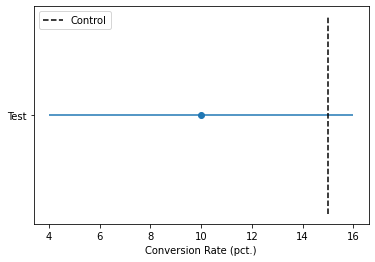

In [3]:
plt.errorbar(
    x=[10],
    y=["Test"],
    xerr=[6]
)

plt.scatter([10], ["Test"])
plt.vlines(15, -1,1, color="black", ls="dashed", label="Control")
plt.legend(loc=2)
plt.xlabel("Conversion Rate (pct.)")

# A/B Test with Continuous Treatments

In [4]:
np.random.seed(123)

t = np.random.binomial(1, 0.5, 1000)
y = np.random.normal(1+0.5*t)

print(y[t==1].mean() - y[t==0].mean())

smf.ols("y~t", pd.DataFrame(dict(y=y,t=t))).fit().summary().tables[1]

0.4311480049522707


,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,1.0025,0.043,23.468,0.000,0.919,1.086
t,0.4311,0.061,7.080,0.000,0.312,0.551


$$
\text{Max. Sum Assured} \sim N(500k, 100k)
$$

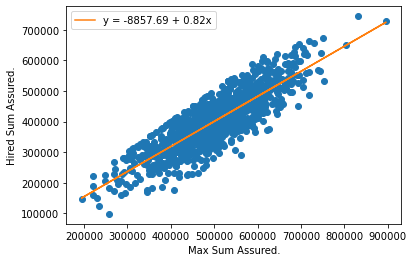

In [5]:
np.random.seed(1)

max_sum_assured = np.random.normal(500000, 100000, 1000)
hired_sum_assured = np.random.normal(0.8*max_sum_assured, 50000).clip(0, max_sum_assured)
data=pd.DataFrame(dict(hired_sum_assured=hired_sum_assured,max_sum_assured=max_sum_assured))

m = smf.ols("hired_sum_assured~max_sum_assured", data).fit()
intercept, slope = m.params.round(2)

plt.scatter(max_sum_assured, hired_sum_assured)
plt.plot(data["max_sum_assured"], m.predict(data), color="C1", label=f"y = {intercept} + {slope}x")
plt.ylabel("Hired Sum Assured.")
plt.xlabel("Max Sum Assured.")
plt.legend();

In [6]:
m.conf_int()

,0,1
Intercept,-25148.659289,7433.272079
max_sum_assured,0.787159,0.850629


$$
N(500k, 100k)
$$

$$
U(100k, 900k)
$$

$$
x \sim B(0.5) \\
t = x*100k + (1-x)900k
$$

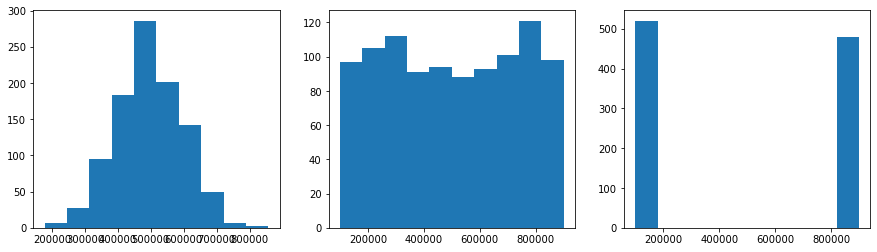

In [7]:
np.random.seed(123)

max_sum_assured_norm = np.random.normal(500000, 100000, 1000)
max_sum_assured_unif = np.random.uniform(100000, 900000, 1000)
max_sum_assured_binom = np.random.choice([100000, 900000], 1000)

fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15,4))
ax1.hist(max_sum_assured_norm)
ax2.hist(max_sum_assured_unif)
ax3.hist(max_sum_assured_binom);

In [8]:
max_sum_assured_norm.std(), max_sum_assured_unif.std(), max_sum_assured_binom.std(),

(100078.75375162333, 234005.9325692277, 399679.8718974975)

In [9]:
np.random.seed(321)

hired_sum_assured_norm = np.random.normal(0.8*max_sum_assured_norm, 50000).clip(0, max_sum_assured_norm)
data=pd.DataFrame(dict(hired_sum_assured=hired_sum_assured_norm,max_sum_assured=max_sum_assured_norm))

m_norm = smf.ols("hired_sum_assured~max_sum_assured", data).fit()


hired_sum_assured_unif = np.random.normal(0.8*max_sum_assured_unif, 50000).clip(0, max_sum_assured_unif)
data=pd.DataFrame(dict(hired_sum_assured=hired_sum_assured_unif,max_sum_assured=max_sum_assured_unif))

m_unif = smf.ols("hired_sum_assured~max_sum_assured", data).fit()


hired_sum_assured_binom = np.random.normal(0.8*max_sum_assured_binom, 50000).clip(0, max_sum_assured_binom)
data=pd.DataFrame(dict(hired_sum_assured=hired_sum_assured_binom, max_sum_assured=max_sum_assured_binom))

m_binom = smf.ols("hired_sum_assured~max_sum_assured", data).fit()


Text(0, 0.5, 'Slope Parameter 95% CI')

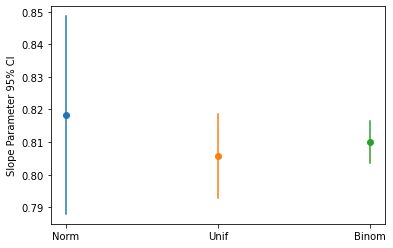

In [10]:
plt.plot(["Norm", "Norm"], m_norm.conf_int().loc["max_sum_assured"])
plt.scatter(["Norm"], m_norm.params.loc["max_sum_assured"])

plt.plot(["Unif", "Unif"], m_unif.conf_int().loc["max_sum_assured"])
plt.scatter(["Unif"], m_unif.params.loc["max_sum_assured"])

plt.plot(["Binom", "Binom"], m_binom.conf_int().loc["max_sum_assured"])
plt.scatter(["Binom"], m_binom.params.loc["max_sum_assured"])

plt.ylabel("Slope Parameter 95% CI")

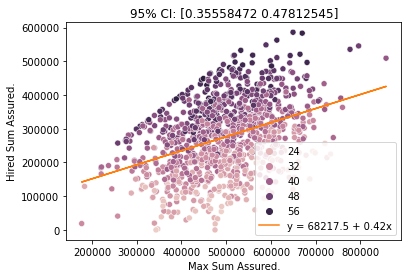

In [11]:
np.random.seed(123)

max_sum_assured = np.random.normal(500000, 100000, 1000)
age = np.random.beta(2,2, 1000)*40+18

hired_sum_assured = np.random.normal(-300000 + 0.4*max_sum_assured + 10000*age, 50000).clip(0, max_sum_assured)

data=pd.DataFrame(dict(hired_sum_assured=hired_sum_assured,max_sum_assured=max_sum_assured, age=age))

m = smf.ols("hired_sum_assured~max_sum_assured", data).fit()
intercept, slope = m.params.round(2)

sns.scatterplot(data=data, x="max_sum_assured", y="hired_sum_assured", hue="age")
plt.plot(data["max_sum_assured"], m.predict(data), color="C1", label=f"y = {intercept} + {slope}x")
plt.ylabel("Hired Sum Assured.")
plt.xlabel("Max Sum Assured.")
plt.title(f"95% CI: {m.conf_int().loc['max_sum_assured'].values}")
plt.legend();

In [12]:
np.random.seed(123)

max_sum_assured = np.random.normal(500000, 100000, 1000)
age = np.random.beta(2,2, 1000)*40+18

hired_sum_assured = np.random.normal(-300000 + 0.4*max_sum_assured + 10000*age, 50000).clip(0, max_sum_assured)

data=pd.DataFrame(dict(hired_sum_assured=hired_sum_assured,max_sum_assured=max_sum_assured, age=age))

m_denoise = smf.ols("hired_sum_assured~age", data).fit()

data["hired_sum_assured_den"] = m_denoise.resid + data["hired_sum_assured"].mean()



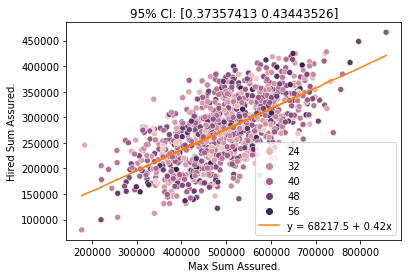

In [13]:
m = smf.ols("hired_sum_assured_den~max_sum_assured+age", data).fit()

sns.scatterplot(data=data, x="max_sum_assured", y="hired_sum_assured_den", hue="age")
plt.plot(data.sort_values("max_sum_assured")["max_sum_assured"],
         m.predict(data.sort_values("max_sum_assured")),
         color="C1", label=f"y = {intercept} + {slope}x")
plt.ylabel("Hired Sum Assured.")
plt.xlabel("Max Sum Assured.")
plt.title(f"95% CI: {m.conf_int().loc['max_sum_assured'].values}")
plt.legend();

# Encouragement Design

In [14]:
n=100000
np.random.seed(123)


u = np.random.uniform(-2, 2, n)

categs = ["never-taker", "complier", "always-takers"]

e = (1/(1+np.exp(-u)))
cust_categ = np.select([e <= 0.3, e <= 0.7, e > 0.7], categs)


# Instrument (Encouragement)
mkt_campaign = np.random.binomial(1, 0.5, n)
choose_prime = (
    ((cust_categ == "complier") & (mkt_campaign == 1)) |
    ((cust_categ == "always-takers"))
).astype(int)


# outcome
group_effect = np.select([cust_categ == "complier", cust_categ == "never-taker", cust_categ == "always-takers"],
                         [700, 200, 900])

pv_0 = np.random.normal(2000 + 500*u, 200).round(2)
pv_1 = pv_0 + group_effect

tau = pv_1 - pv_0
pv = pv_0 + group_effect*choose_prime



df = pd.DataFrame(dict(categ=cust_categ,
                       mkt_campaign=mkt_campaign,
                       prime_card=choose_prime,
                       pv=pv,
                       tau=tau,))[
    ['mkt_campaign',
     'prime_card', 'pv', 'tau', 'categ']
]

df.head()
 

,mkt_campaign,prime_card,pv,tau,categ
0,0,0,2793.76,700.0,complier
1,0,0,1422.59,200.0,never-taker
2,0,0,1483.11,200.0,never-taker
3,1,1,2704.06,700.0,complier
4,0,1,3307.42,900.0,always-takers


In [15]:
smf.ols("pv~prime_card", data=df).fit().params


Intercept     1590.699510
prime_card    1633.407082
dtype: float64

In [16]:
len(df.query("categ=='complier'"))/len(df)

0.42431

In [17]:
compliance_rate = smf.ols("prime_card~mkt_campaign", data=df).fit().params["mkt_campaign"]

compliance_rate

0.4265558615237386

In [18]:
itte = smf.ols("pv~mkt_campaign", data=df).fit().params["mkt_campaign"]
itte

301.8430011305487

In [19]:
att = itte/compliance_rate
att

707.6283046546545

In [20]:
from linearmodels import IV2SLS

formula = 'pv ~ 1 + [prime_card ~ mkt_campaign]'
iv_model = IV2SLS.from_formula(formula, df).fit(cov_type="unadjusted")

iv_model.summary.tables[1]

,Parameter,Std. Err.,T-stat,P-value,Lower CI,Upper CI
Intercept,2055.3,5.4768,375.27,0.0000,2044.5,2066.0
prime_card,707.63,10.044,70.452,0.0000,687.94,727.31


$$
\sigma(\hat{\beta}) \approx \dfrac{\sigma(y-\hat{\beta}T)}{\hat{\theta}\sigma(Z)\sqrt{n}}
$$

# Geo Experiments

In [21]:
mkt_df = (pd.read_csv("https://raw.githubusercontent.com/matheusfacure/causal-inference-in-python-code/main/causal-inference-in-python/data/online_mkt.csv")
          .astype({"date":"datetime64[ns]"})
          .query("post==0"))


mkt_df.head()

,app_download,population,city,state,date,post,treated
0,3066.0,12396372,sao_paulo,sao_paulo,2022-03-01,0,1
1,2701.0,12396372,sao_paulo,sao_paulo,2022-03-02,0,1
2,1927.0,12396372,sao_paulo,sao_paulo,2022-03-03,0,1
3,1451.0,12396372,sao_paulo,sao_paulo,2022-03-04,0,1
4,1248.0,12396372,sao_paulo,sao_paulo,2022-03-05,0,1


In [22]:
f = (mkt_df.groupby("city")["population"].first()
     /mkt_df.groupby("city")["population"].first().sum())

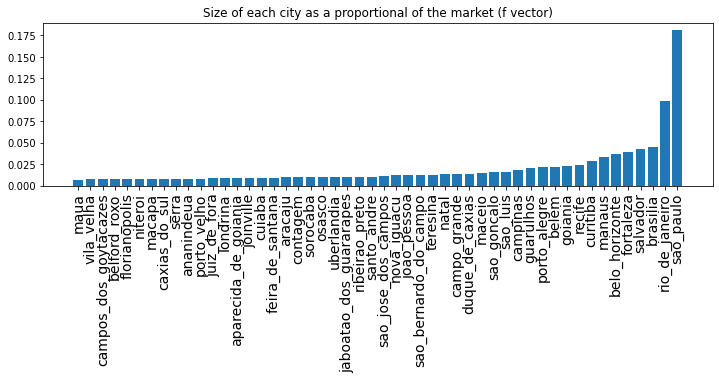

In [23]:
plt.figure(figsize=(12,3))
plt.bar(f.sort_values().index, f.sort_values().values)
plt.title("Size of each city as a proportional of the market (f vector)")
plt.xticks(rotation=90, fontsize=14);

In [24]:
len(mkt_df["city"].unique())

50

$$
\tau = \pmb{\bar{y}}_{post, tr} - \pmb{\hat{y}}_{post, co}
$$

$$
\pmb{\hat{y}}_{post, co} = \pmb{Y}_{post, co} \pmb{w}_{co}
$$

\begin{split}
\hat{w}^{sc} = \underset{w}{\mathrm{argmin}} \ ||\pmb{\bar{y}}_{pre, tr} - \pmb{Y}_{pre, co} \pmb{w}_{co}||^2_2 \\
\text{s.t } \ \sum w_i = 1 \text{ and } \ w_i > 0 \ \forall \ i
\end{split}

In [25]:
from sklearn.base import BaseEstimator, RegressorMixin
from sklearn.utils.validation import check_X_y, check_array, check_is_fitted
import cvxpy as cp

class SyntheticControl(BaseEstimator, RegressorMixin):

    def __init__(self, fit_intercept=False):
        self.fit_intercept = fit_intercept

    def fit(self, y_pre_co, y_pre_tr):

        y_pre_co, y_pre_tr = check_X_y(y_pre_co, y_pre_tr)
        
        # add intercept
        intercept = np.ones((y_pre_co.shape[0], 1))*self.fit_intercept
        X = np.concatenate([intercept, y_pre_co], axis=1)
        w = cp.Variable(X.shape[1])
        
        objective = cp.Minimize(cp.sum_squares(X@w - y_pre_tr))
        constraints = [cp.sum(w[1:]) == 1, w[1:] >= 0]
        
        problem = cp.Problem(objective, constraints)
        
        self.loss_ = problem.solve(eps_abs=1)
        self.w_ = w.value[1:] 
        self.intercept_ = w.value[0] 
        
        self.is_fitted_ = True
        return self
        
        
    def predict(self, y_co):

        check_is_fitted(self)
        y_co = check_array(y_co)
        
        return y_co @ self.w_ + self.intercept_

In [26]:
df_piv = (mkt_df
          .pivot("date", "city", "app_download"))

df_piv.head()

city,ananindeua,aparecida_de_goiania,aracaju,belem,belford_roxo,belo_horizonte,brasilia,campinas,campo_grande,campos_dos_goytacazes,...,sao_bernardo_do_campo,sao_goncalo,sao_jose_dos_campos,sao_luis,sao_paulo,serra,sorocaba,teresina,uberlandia,vila_velha
date,,,,,,,,,,,,,,,,,,,,,
2022-03-01,11.0,54.0,65.0,49.0,52.0,194.0,449.0,326.0,305.0,42.0,...,208.0,148.0,173.0,28.0,3066.0,46.0,207.0,68.0,29.0,63.0
2022-03-02,5.0,20.0,42.0,44.0,25.0,130.0,367.0,172.0,261.0,24.0,...,185.0,157.0,137.0,4.0,2701.0,48.0,98.0,17.0,29.0,11.0
2022-03-03,2.0,0.0,0.0,24.0,13.0,112.0,219.0,292.0,171.0,28.0,...,96.0,72.0,171.0,6.0,1927.0,28.0,87.0,55.0,30.0,14.0
2022-03-04,0.0,0.0,11.0,4.0,34.0,56.0,265.0,154.0,175.0,43.0,...,123.0,102.0,0.0,5.0,1451.0,22.0,47.0,49.0,35.0,0.0
2022-03-05,5.0,5.0,0.0,16.0,12.0,45.0,135.0,122.0,189.0,35.0,...,99.0,53.0,112.0,12.0,1248.0,21.0,36.0,31.0,6.0,1.0


# Random Set

In [27]:
y_avg = df_piv.dot(f)
geos = list(df_piv.columns)
n_tr = 5

In [28]:
np.random.seed(1)
rand_geos = np.random.choice(geos, n_tr, replace=False)
rand_geos

array(['manaus', 'recife', 'sao_bernardo_do_campo', 'salvador', 'aracaju'],
      dtype='<U23')

In [29]:
def get_sc(geos, df_sc, y_mean_pre):
    
    model = SyntheticControl(fit_intercept=True)
    model.fit(df_sc[geos], y_mean_pre)
    
    selected_geos = geos[np.abs(model.w_) > 1e-5]
    
    return {"geos": selected_geos, "loss": model.loss_ }


get_sc(rand_geos, df_piv, y_avg)

{'geos': array(['salvador', 'aracaju'], dtype='<U23'),
 'loss': 1598616.80875266}

In [30]:
def get_sc_st_combination(treatment_geos, df_sc, y_mean_pre):
    
    treatment_result = get_sc(treatment_geos, df_sc, y_mean_pre)
    
    remaining_geos = df_sc.drop(
        columns=treatment_result["geos"]
    ).columns
    
    control_result = get_sc(remaining_geos, df_sc, y_mean_pre)

    return {"st_geos": treatment_result["geos"],
            "sc_geos": control_result["geos"],
            "loss": treatment_result["loss"] + control_result["loss"]}


resulting_geos = get_sc_st_combination(rand_geos, df_piv, y_avg)

In [31]:
resulting_geos.get("st_geos")

array(['salvador', 'aracaju'], dtype='<U23')

In [32]:
len(resulting_geos.get("st_geos")) + len(resulting_geos.get("sc_geos"))

50

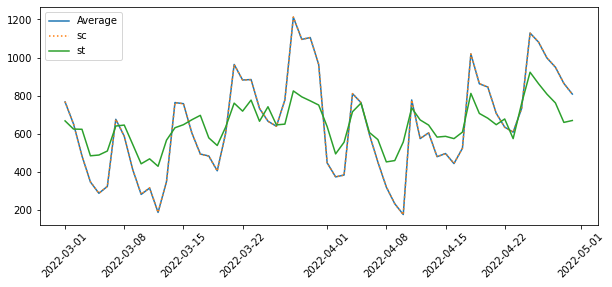

In [33]:
synthetic_tr = SyntheticControl(fit_intercept=True)
synthetic_co = SyntheticControl(fit_intercept=True)

synthetic_tr.fit(df_piv[resulting_geos.get("st_geos")], y_avg)
synthetic_co.fit(df_piv[resulting_geos.get("sc_geos")], y_avg)

plt.figure(figsize=(10,4))
plt.plot(y_avg, label="Average")
plt.plot(y_avg.index, synthetic_co.predict(df_piv[resulting_geos.get("sc_geos")]), label="sc", ls=":")
plt.plot(y_avg.index, synthetic_tr.predict(df_piv[resulting_geos.get("st_geos")]), label="st")


plt.xticks(rotation=45)
plt.legend()

# Random Search

In [34]:
from joblib import Parallel, delayed
from toolz import partial

np.random.seed(1)
geo_samples = [np.random.choice(geos, n_tr, replace=False) 
               for _ in range(1000)]

est_combination = partial(get_sc_st_combination,
                          df_sc=df_piv,
                          y_mean_pre=y_avg)

results = Parallel(n_jobs=4)(delayed(est_combination)(geos)
                             for geos in geo_samples)

In [35]:
resulting_geos = min(results, key=lambda x: x.get("loss"))
resulting_geos.get("st_geos")


array(['nova_iguacu', 'belem', 'joinville', 'sao_paulo'], dtype='<U23')

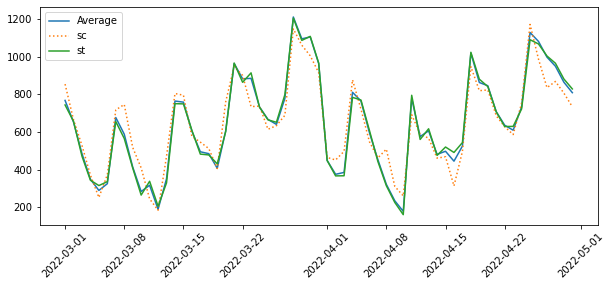

In [36]:
synthetic_tr = SyntheticControl(fit_intercept=True)
synthetic_co = SyntheticControl(fit_intercept=True)

synthetic_tr.fit(df_piv[resulting_geos.get("st_geos")], y_avg)
synthetic_co.fit(df_piv[resulting_geos.get("sc_geos")], y_avg)


plt.figure(figsize=(10,4))
plt.plot(y_avg, label="Average")
plt.plot(y_avg.index, synthetic_co.predict(df_piv[resulting_geos.get("sc_geos")]), label="sc", ls=":")
plt.plot(y_avg.index, synthetic_tr.predict(df_piv[resulting_geos.get("st_geos")]), label="st")


plt.xticks(rotation=45)
plt.legend()

In [37]:
city_share = f.to_dict()

def compute_share(st_sc_result, city_share):
    geos = st_sc_result.get("st_geos")
    return sum(city_share.get(geo) for geo in geos)

compute_share(results[0], city_share)

0.05215568236158819

In [38]:
results_filtered = list(filter(lambda g: compute_share(g, city_share) <= 0.1, results))

In [39]:
resulting_geos = min(results_filtered, key=lambda x: x.get("loss"))
resulting_geos.get("st_geos")


array(['maceio', 'brasilia', 'ananindeua', 'campinas', 'cuiaba'],
      dtype='<U23')

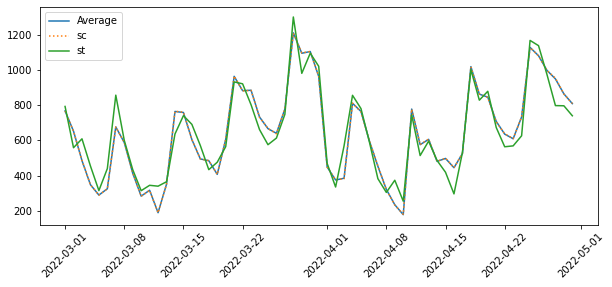

In [40]:
synthetic_tr = SyntheticControl(fit_intercept=True)
synthetic_co = SyntheticControl(fit_intercept=True)

synthetic_tr.fit(df_piv[resulting_geos.get("st_geos")], y_avg)
synthetic_co.fit(df_piv[resulting_geos.get("sc_geos")], y_avg)


plt.figure(figsize=(10,4))
plt.plot(y_avg, label="Average")
plt.plot(y_avg.index, synthetic_co.predict(df_piv[resulting_geos.get("sc_geos")]), label="sc", ls=":")
plt.plot(y_avg.index, synthetic_tr.predict(df_piv[resulting_geos.get("st_geos")]), label="st")


plt.xticks(rotation=45)
plt.legend()

## Power Analysis

In [41]:
def reshape_sc_data(df: pd.DataFrame,
                    geo_col: str, 
                    time_col: str,
                    y_col: str,
                    tr_geos: str,
                    tr_start: str):
    
    df_pivot = df.pivot(time_col, geo_col, y_col)
    
    y_co = df_pivot.drop(columns=tr_geos)
    y_tr = df_pivot[tr_geos]
    
    y_pre_co = y_co[df_pivot.index < tr_start]
    y_pre_tr = y_tr[df_pivot.index < tr_start]
    
    y_post_co = y_co[df_pivot.index >= tr_start]
    y_post_tr = y_tr[df_pivot.index >= tr_start]
    
    return y_pre_co, y_pre_tr, y_post_co, y_post_tr

In [42]:
y_pre_co, y_pre_tr, y_post_co, y_post_tr = reshape_sc_data(
    mkt_df,
    geo_col="city",
    time_col="date",
    y_col="app_download",
    tr_geos=['maceio', 'brasilia', 'ananindeua', 'campinas', 'cuiaba'],
    tr_start="2022-04-15"
)

sim_effect = 0
y_post_tr = y_post_tr+sim_effect

y_pre_tr.head()

city,maceio,brasilia,ananindeua,campinas,cuiaba
date,,,,,
2022-03-01,70.0,449.0,11.0,326.0,39.0
2022-03-02,49.0,367.0,5.0,172.0,22.0
2022-03-03,54.0,219.0,2.0,292.0,3.0
2022-03-04,22.0,265.0,0.0,154.0,15.0
2022-03-05,47.0,135.0,5.0,122.0,37.0


In [43]:
y_post_tr_avg = y_post_tr.mean(axis=1)
y_pre_tr_avg = y_pre_tr.mean(axis=1)

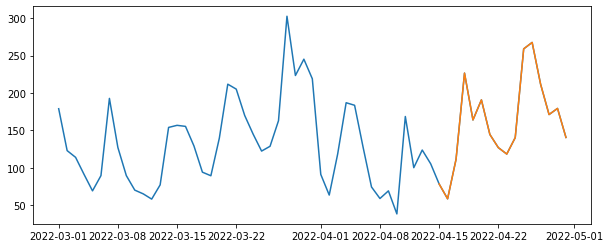

In [44]:
plt.figure(figsize=(10,4))

plt.plot(pd.concat([y_pre_tr_avg, y_post_tr_avg-sim_effect], axis=0))
plt.plot(y_post_tr_avg)



In [45]:
synthetic_co = SyntheticControl(fit_intercept=True)
synthetic_co.fit(y_pre_co, y_pre_tr_avg)

SyntheticControl(fit_intercept=True)

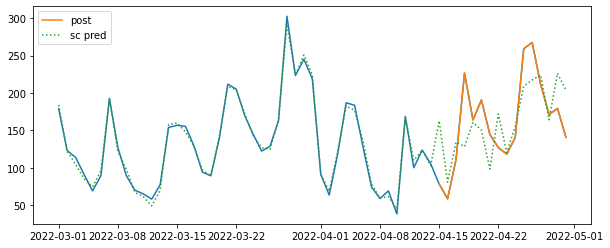

In [46]:
plt.figure(figsize=(10,4))

plt.plot(pd.concat([y_pre_tr_avg, y_post_tr_avg-sim_effect], axis=0))
plt.plot(y_post_tr_avg, label="post")

y_co = pd.concat([y_pre_co, y_post_co], axis=0)
plt.plot(y_co.index, synthetic_co.predict(y_co), label="sc pred", ls=":")
plt.legend()

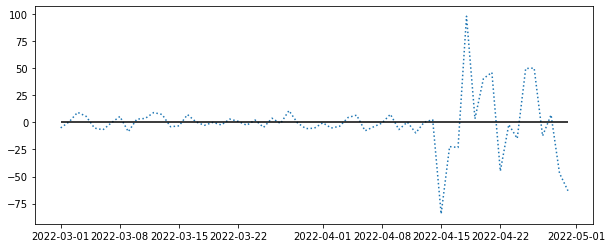

In [47]:
plt.figure(figsize=(10,4))
plt.plot(y_co.index, pd.concat([y_pre_tr_avg, y_post_tr_avg], axis=0) - synthetic_co.predict(y_co), label="sc", ls=":")
plt.hlines(0, y_co.index.min(), y_co.index.max(), color="black")

In [48]:
def debiased_sc_atts(y_pre_co, y_pre_tr, y_post_co, y_post_tr, K=3):
        
    block_size = int(min(np.floor(len(y_pre_tr)/K), len(y_post_tr)))
    blocks = np.split(y_pre_tr.index[-K*block_size:], K)
    
    def fold_effect(hold_out):
        model = SyntheticControl(fit_intercept=True)
        model.fit(
            y_pre_co.drop(hold_out),
            y_pre_tr.drop(hold_out)
        )
        
        bias_hat = np.mean(y_pre_tr.loc[hold_out]
                           - model.predict(y_pre_co.loc[hold_out]))
        
        y0_hat = model.predict(y_post_co)
        return (y_post_tr - y0_hat) - bias_hat
    
    
    return pd.DataFrame([fold_effect(block) for block in blocks]).T

In [49]:
deb_atts = debiased_sc_atts(y_pre_co,
                            y_pre_tr_avg,
                            y_post_co,
                            y_post_tr_avg,
                            K=3)

deb_atts.head()


,0,1,2
date,,,
2022-04-15,-55.669503,-71.853424,-62.231563
2022-04-16,-57.605216,-35.121991,-34.110678
2022-04-17,28.705977,-10.883027,-4.871091
2022-04-18,67.778965,89.227978,51.669998
2022-04-19,-36.255769,-16.851366,-32.409686


In [50]:
atts_k = deb_atts.mean(axis=0).values
att = np.mean(atts_k)

print("atts_k:", atts_k)
print("ATT:", att)

atts_k: [ -3.37636158  -2.94918182 -13.06557426]
ATT: -6.463705887133785


In [51]:
K = len(atts_k)
T0 = len(y_pre_co)
T1 = len(y_post_co)
block_size = min(np.floor(T0/K), T1)

se_hat=np.sqrt(1+((K*block_size)/T1))*np.std(atts_k, ddof=1)/np.sqrt(K)

print("SE:", se_hat)

SE: 6.449776043972349


In [52]:
from scipy.stats import t
alpha = 0.1

[att - t.ppf(1-alpha/2, K-1)*se_hat,
 att + t.ppf(1-alpha/2, K-1)*se_hat]

[-25.29695893205549, 12.36954715778792]

In [53]:
def compute_ci(deb_atts, alpha = 0.1):

    atts_k = deb_atts.mean(axis=0).values
    att = np.mean(atts_k)

    K = len(atts_k)
    T0 = len(y_pre_co)
    T1 = len(y_post_co)
    block_size = min(np.floor(T0/K), T1)

    se_hat=np.sqrt(1+((K*block_size)/T1))*np.std(atts_k, ddof=1)/np.sqrt(K)


    return [att - t.ppf(1-alpha/2, K-1)*se_hat, att + t.ppf(1-alpha/2, K-1)*se_hat]


In [54]:
y_pre_co, y_pre_tr, y_post_co, y_post_tr = reshape_sc_data(
    mkt_df,
    geo_col="city",
    time_col="date",
    y_col="app_download",
    tr_geos=['maceio', 'brasilia', 'ananindeua', 'campinas', 'cuiaba'],
    tr_start="2022-04-15"
)

In [55]:
sizes = list(range(5,len(y_pre_co)+1, 5))
cis = [compute_ci(debiased_sc_atts(y_pre_co.iloc[-size:],
                                   y_pre_tr.iloc[-size:].mean(axis=1),
                                   y_post_co,
                                   y_post_tr.mean(axis=1),
                                   K=3))
            for size in sizes]




Text(0, 0.5, 'Average Treatment Effect')

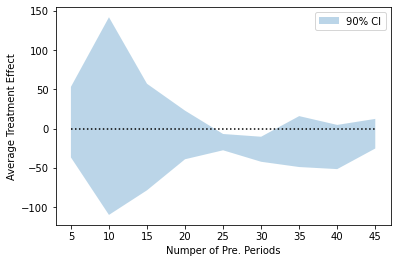

In [56]:
plt.fill_between(sizes, np.array(cis)[:,0], np.array(cis)[:,1], alpha=0.3, label="90% CI")
plt.hlines(0, min(sizes), max(sizes), color="black", ls=":")
plt.legend()
plt.xlabel("Numper of Pre. Periods")
plt.ylabel("Average Treatment Effect")

# Switchback Experiment

In [57]:
def var_opt_design(d_opt, y_opt, T, m):
    
    assert ((T//m == T/m)
            & (T//m >= 4)), "T must be divisible by m and T/m >= 4"
    
    # discard 1st block
    y_m_blocks = np.vstack(np.hsplit(y_opt, int(T/m))).sum(axis=1)[1:]
    
    # take 1st column
    d_m_blocks = np.vstack(np.split(d_opt, int(T/m))[1:])[:, 0] 
    
    return (
        8*y_m_blocks[0]**2 
        + (32*y_m_blocks[1:-1]**2*(np.diff(d_m_blocks)==0)[:-1]).sum()
        + 8*y_m_blocks[-1]**2 
    ) / (T-m)**2

In [58]:
def gen_d(rand_points, p):
    result = [np.random.binomial(1, p)]
    
    for t in rand_points[1:]:
        result.append(np.random.binomial(1, p)*t + (1-t)*result[-1])
    
    return np.array(result)


def y_given_d(d, T, effect_params=[3,2,1], seed=None):
    np.random.seed(seed)
    x = np.arange(1, T+1)
    return (np.log(x+1)
            + 2*np.sin(x*2*np.pi/24)
            + np.convolve(~d.astype(bool), effect_params)[:-(len(effect_params)-1)]
            + np.random.normal(0, 1, T)
           ).round(2)


m = 2
T = 120
p = 0.5



In [59]:
result = []

for T in range(40,800, 20):
    n = T//m 
    
    rand_points_opt = np.isin(
        np.arange(1, T+1),
        [1] + [i*m+1 for i in range(2, int(n)-1)]
    )
    
    np.random.seed(1)
    
    d_opt = gen_d(rand_points_opt, p)
    y_opt = y_given_d(d_opt, T=T, seed=1)
    
    variance = var_opt_design(d_opt, y_opt, T=T, m=m)
    
    result.append({"size": T, "se": np.sqrt(variance)})

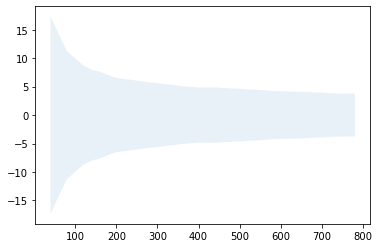

In [60]:
result_df = pd.DataFrame(result)

plt.fill_between(result_df["size"], -2.0*result_df["se"], +2.0*result_df["se"], alpha=0.1)